In [1]:
import numpy as np
from numpy import linalg
from numpy import dot, multiply, diag, power
from matplotlib import cm
from matplotlib import pyplot as plt
from scipy.linalg import qr
from scipy.linalg import svd

y = np.linspace(-2,2,401) # spatial coordinate
Ny = np.size(y)

amp1 = 1
y01 = 0.5
sigmay1 = 0.6

amp2 = 1.2
y02 = -0.3
sigmay2 = 0.3

dt = 0.2
Nt = 101
tend = dt*(Nt-1)
t = np.linspace(0,tend,Nt) # time

omega1 = 1.2
omega2 = 5.3

v1 = amp1*np.exp(-((y-y01)**2)/(2*sigmay1**2))
v2 = amp2*np.exp(-((y-y02)**2)/(2*sigmay2**2))

X = np.zeros([Ny,Nt],dtype=complex)
for tt in range(Nt):
    X[:,tt] = v1*np.exp(1j*omega1*t[tt])+v2*np.exp(1j*omega2*t[tt])

## Question 1

##### Part a

In [2]:
# Performing QR decomposition with column pivoting
U2,Sig2,Vh2 = qr(X, pivoting=True)

# Identifying the indices of the two most significant columns
most_significant_columns = Vh2[:2]

# Finding the corresponding best spatial locations from the y array
best_spatial_locations = y[most_significant_columns]

print("Indices of the most significant columns:", most_significant_columns)
print("Best spatial locations to measure:", best_spatial_locations)

Indices of the most significant columns: [ 0 88]
Best spatial locations to measure: [-2.   -1.12]


##### Part b

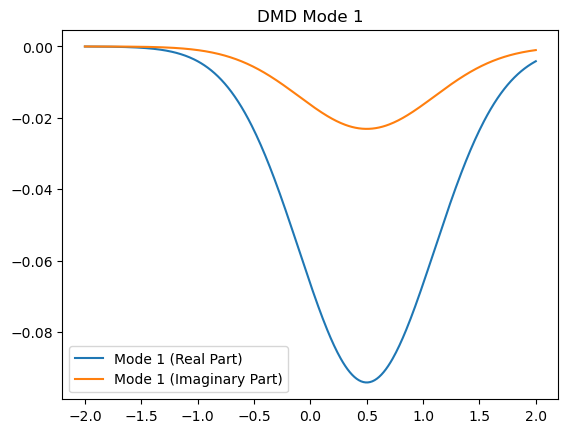

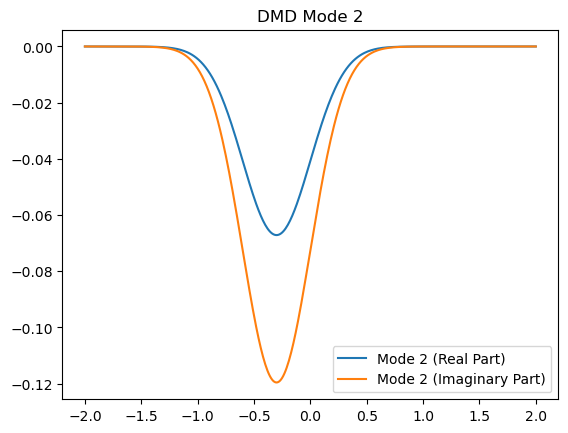

In [3]:
# Splitting the Data Matrix
X1 = X[:, :-1]
X2 = X[:, 1:]

# SVD of X1
U, Sigma, Vh = svd(X1, full_matrices=False)
r = 2  # Truncation rank, assuming we want to keep the first two modes

Ur = U[:, :r]
Sigmar = np.diag(Sigma[:r])
Vhr = Vh[:r, :]

# Approximate Linear Operator A
Atilde = Ur.T.conj() @ X2 @ Vhr.T.conj() @ np.linalg.inv(Sigmar)

# Eigendecomposition of Atilde
eigenvalues, W = np.linalg.eig(Atilde)

# DMD Modes
Phi = X2 @ Vhr.T.conj() @ np.linalg.inv(Sigmar) @ W

# Identifying Nonzero Eigenvalues and Corresponding Eigenvectors
nonzero_indices = np.abs(eigenvalues) > 1e-6
nonzero_eigenvalues = eigenvalues[nonzero_indices]
nonzero_modes = Phi[:, nonzero_indices]

for i, mode in enumerate(nonzero_modes.T):
    plt.figure()
    plt.plot(y, np.real(mode), label=f'Mode {i+1} (Real Part)')
    plt.plot(y, np.imag(mode), label=f'Mode {i+1} (Imaginary Part)')
    plt.title(f'DMD Mode {i+1}')
    plt.legend()
    plt.show()

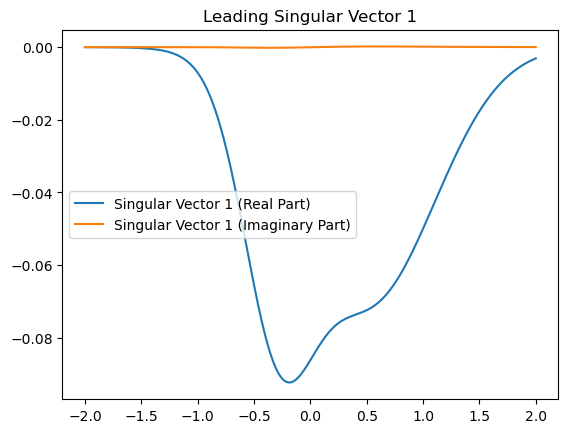

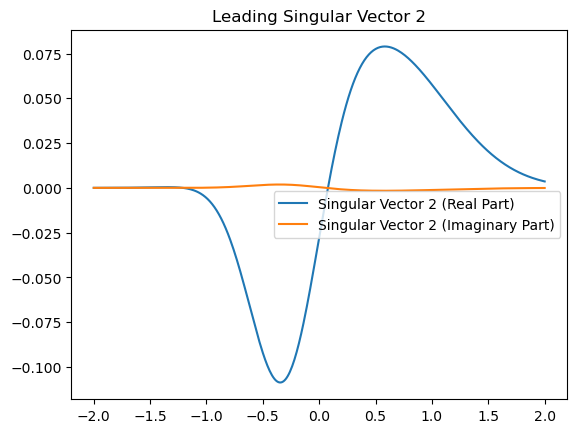

In [4]:
import matplotlib.pyplot as plt

# Performing SVD on the entire data matrix X
U_full, Sigma_full, Vh_full = svd(X, full_matrices=False)

# Number of modes to plot for comparison
num_modes_to_plot = 2

for i in range(num_modes_to_plot):
    plt.figure()
    plt.plot(y, np.real(U_full[:, i]), label=f'Singular Vector {i+1} (Real Part)')
    plt.plot(y, np.imag(U_full[:, i]), label=f'Singular Vector {i+1} (Imaginary Part)')
    plt.title(f'Leading Singular Vector {i+1}')
    plt.legend()
    plt.show()

In comparing the two, we find that the leading singular vectors capture the most dominant patterns in the data, which might be similar to the dominant DMD modes if these patterns are also dynamically significant. However, DMD provides additional insight into how these patterns evolve over time, which SVD does not capture. The comparison can reveal how static spatial patterns (SVD) relate to dynamic processes (DMD) in the dataset.

##### Part C

In [5]:
# Converting Discrete-Time Eigenvalues to Continuous-Time
lambda_c = np.log(eigenvalues) / dt

print("Continuous-Time Eigenvalues (λc):", lambda_c)
print("Data Generation Frequencies: ω1 =", omega1, ", ω2 =", omega2)

# Extracting the imaginary parts of the continuous-time eigenvalues
imag_lambda_c = np.imag(lambda_c)

print("Imaginary parts of λc:", imag_lambda_c)

# Closest match for each data generation frequency
closest_to_omega1 = min(imag_lambda_c, key=lambda x: abs(x - omega1))
closest_to_omega2 = min(imag_lambda_c, key=lambda x: abs(x - omega2))

print("Closest match for ω1 in λc:", closest_to_omega1)
print("Closest match for ω2 in λc:", closest_to_omega2)


Continuous-Time Eigenvalues (λc): [6.59194921e-16+1.2j 6.24500451e-16+5.3j]
Data Generation Frequencies: ω1 = 1.2 , ω2 = 5.3
Imaginary parts of λc: [1.2 5.3]
Closest match for ω1 in λc: 1.2000000000000015
Closest match for ω2 in λc: 5.300000000000001


The nonzero eigenvalues of (A) from the Dynamic Mode Decomposition (DMD) analysis, when converted to continuous-time eigenvalues lambda_c, should have imaginary parts that correspond to the oscillation frequencies w1 and w2 used in generating the data. These eigenvalues contain the dynamics of the data's oscillatory behavior. The real parts of lambda_c are expected to be close to zero, assuming the data does not exhibit exponential growth or decay over time.

## Question 2

In [6]:
import numpy as np
from numpy import linalg
from matplotlib import cm
from matplotlib import pyplot as plt
from scipy.linalg import qr # for pivoted qr

y = np.linspace(-2,2,401) # spatial coordinate
Ny = np.size(y)

amp1 = 1
y01 = 0.5
sigmay1 = 0.6

amp2 = 1.2
y02 = -0.5
sigmay2 = 0.3

dt = 0.1
Nt = 801
tend = dt*(Nt-1)
t = np.linspace(0,tend,Nt) # time

omega1 = 1.3
omega2 = 4.1

v1 = amp1*np.exp(-((y-y01)**2)/(2*sigmay1**2))
v2 = amp2*np.exp(-((y-y02)**2)/(2*sigmay2**2))

X = np.zeros([Ny,Nt])
for tt in range(Nt):
    sigmay1t = sigmay1+0.8*np.cos(omega1*t[tt])
    v1 = amp1*np.exp(-((y-y01)**2)/(2*sigmay1t**2))
    v2 = amp2*np.exp(-((y-y02)**2)/(2*sigmay2**2))
    X[:,tt] = v1*np.cos(omega1*t[tt])+v2*np.cos(omega2*t[tt])

##### Part A

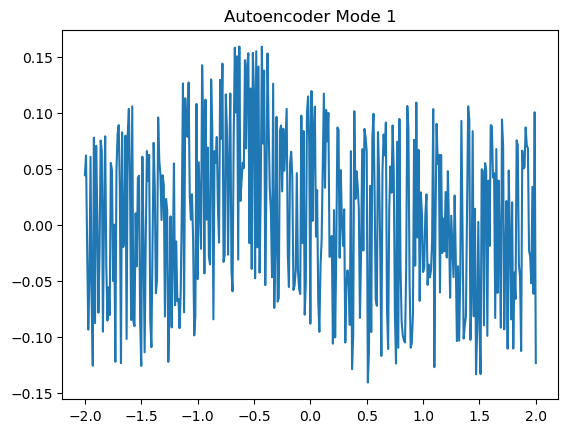

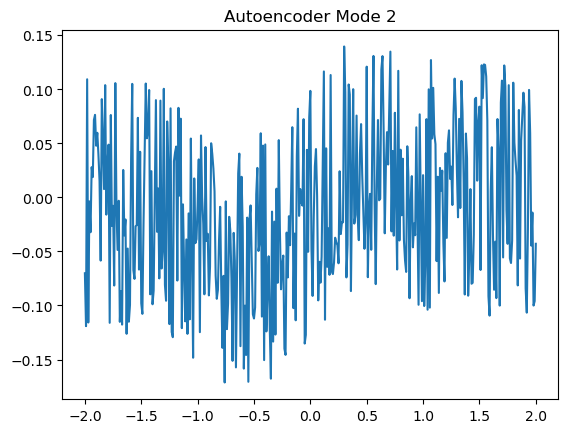

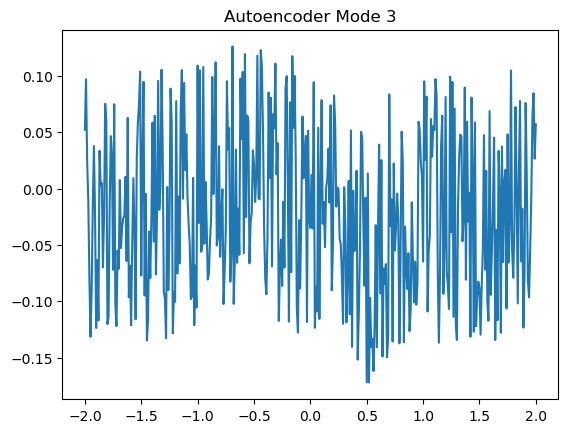

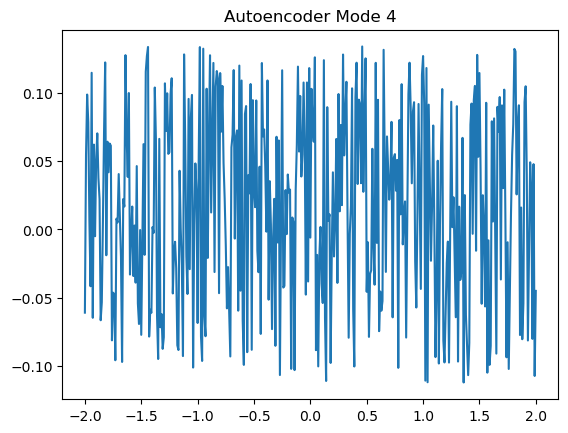

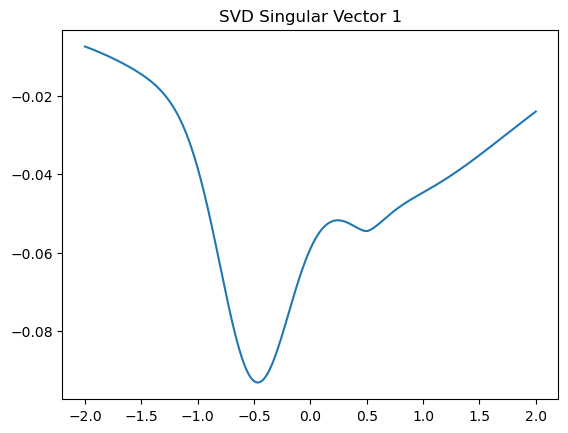

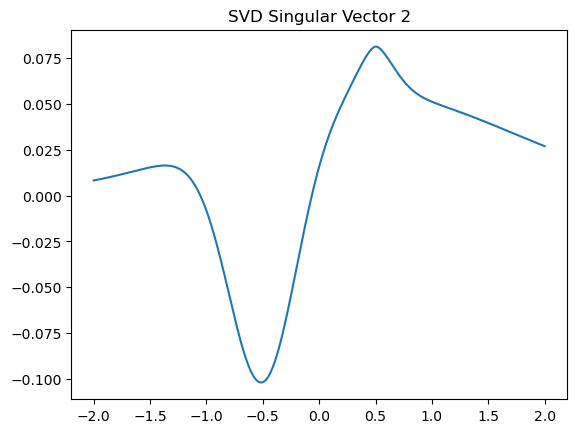

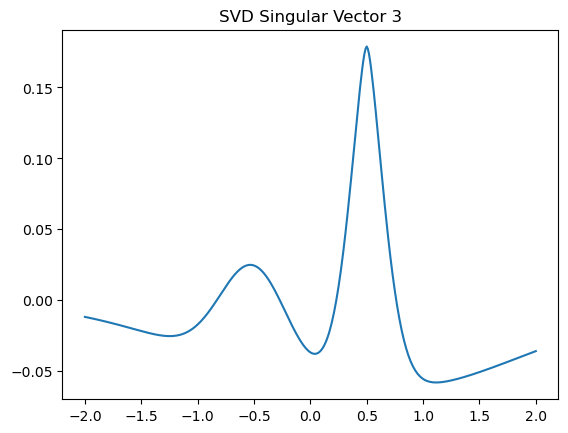

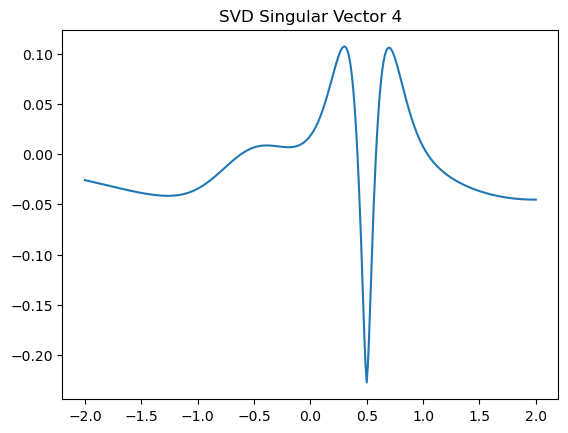

In [7]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from scipy.linalg import svd
import matplotlib.pyplot as plt

input_dim = Ny  # Number of features
encoding_dim = 4  # Reduced dimension

# Encoder
encoder = Sequential([
    Dense(encoding_dim, input_shape=(input_dim,), activation='linear')
])

# Decoder
decoder = Sequential([
    Dense(input_dim, input_shape=(encoding_dim,), activation='linear')
])

# Autoencoder
autoencoder = Sequential([encoder, decoder])

# Compiling the model
autoencoder.compile(optimizer='adam', loss='mse')

# Training the Autoencoder
autoencoder.fit(X.T, X.T, epochs=50, batch_size=256, shuffle=True, verbose=0)

# Extracting and Visualizing Autoencoder Modes
encoder_weights = encoder.get_weights()[0]  # Weights from input layer to encoded layer

for i in range(encoding_dim):
    plt.figure()
    plt.plot(y, encoder_weights[:, i])
    plt.title(f'Autoencoder Mode {i+1}')
    plt.show()

# SVD on the Data
U, S, Vh = svd(X, full_matrices=False)

# Visualizing the leading SVD singular vectors for comparison
for i in range(encoding_dim):
    plt.figure()
    plt.plot(y, U[:, i])
    plt.title(f'SVD Singular Vector {i+1}')
    plt.show()

The differences between the autoencoder modes and the SVD singular vectors are very noticeable. The SVD vectors seem to capture the most significant features in a much cleaner and interpretable manner. The autoencoder's modes seem to be interrupted by noise, which could be due to several reasons, including the choice of architecture or the need for more sophisticated preprocessing of the data.

##### Part B

26/26 [==============================] - 0s 1ms/step
Reconstruction error: 0.05328455092446768
26/26 [==============================] - 0s 881us/step


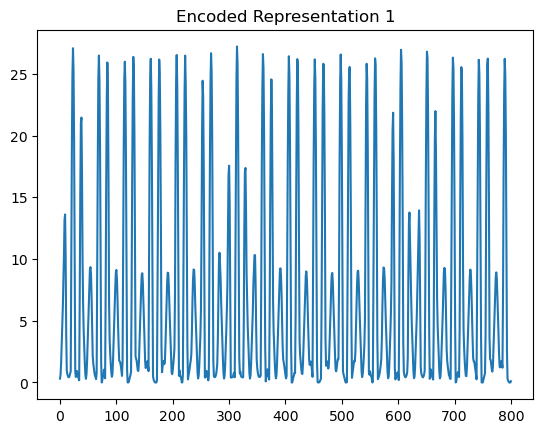

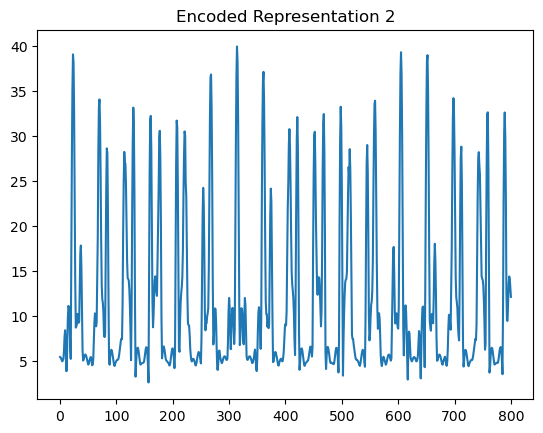

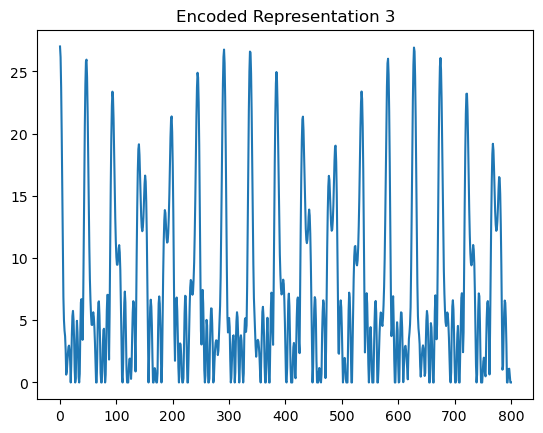

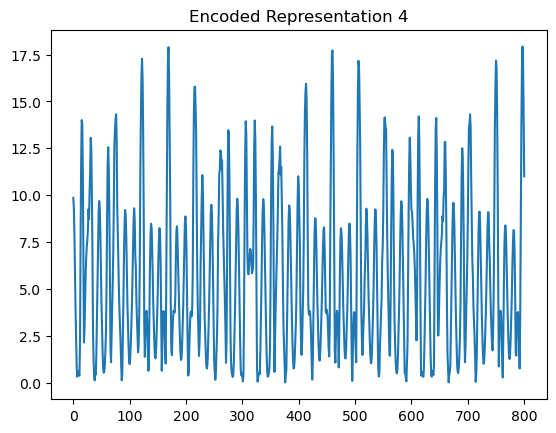

In [8]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# Nonlinear Autoencoders
input_data = Input(shape=(input_dim,))
encoded = Dense(128, activation='relu')(input_data)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(encoding_dim, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

autoencoder = Model(input_data, decoded)
encoder = Model(input_data, encoded)

autoencoder.compile(optimizer='adam', loss='mse')

# Training the Autoencoders
autoencoder.fit(X.T, X.T, epochs=100, batch_size=256, shuffle=True, verbose=0)

# Evaluating the performance
reconstruction = autoencoder.predict(X.T)
reconstruction_error = np.mean(np.power(X.T - reconstruction, 2))
print(f"Reconstruction error: {reconstruction_error}")

# Visualizing Best Autoencoder Modes
encoded_data = encoder.predict(X.T)

for i in range(encoding_dim):
    plt.figure()
    plt.plot(encoded_data[:, i])
    plt.title(f'Encoded Representation {i+1}')
    plt.show()


Visually, the autoencoder’s encoded representations are more detailed and potentially capture more complex data structures than SVD’s smoother singular vectors.
This reveals differences in how each method approximates the data.